# Credit Card Customer Segmentation

# Importing necessary libraries

In [1]:
# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np

# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)

# to scale the data using z-score
from sklearn.preprocessing import StandardScaler

# to perform k-means clustering and compute silhouette scores
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# to define a common seed value to be used throughout
RS=0

# to suppress warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
customer_data = pd.read_csv(r"D:\Credit_Card.csv")
customer_data

,Sl_No,Customer_Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1,87073,100000,2,1,1,0
1,2,38414,50000,3,0,10,9
2,3,17341,50000,7,1,3,4
3,4,40496,30000,5,1,1,4
4,5,47437,100000,6,0,12,3
...,...,...,...,...,...,...,...
650,656,51108,99000,10,1,10,0
651,657,60732,84000,10,1,13,2
652,658,53834,145000,8,1,9,1
653,659,80655,172000,10,1,15,0


In [3]:
df = customer_data.copy()

In [4]:
df.head()

,Sl_No,Customer_Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1,87073,100000,2,1,1,0
1,2,38414,50000,3,0,10,9
2,3,17341,50000,7,1,3,4
3,4,40496,30000,5,1,1,4
4,5,47437,100000,6,0,12,3


In [21]:
# df = df.drop(['Sl_No','Customer_Key'], axis = 1, inplace=True)

In [6]:
df.head()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,100000,2,1,1,0
1,50000,3,0,10,9
2,50000,7,1,3,4
3,30000,5,1,1,4
4,100000,6,0,12,3


In [8]:
df.isna().sum()

Avg_Credit_Limit       0
Total_Credit_Cards     0
Total_visits_bank      0
Total_visits_online    0
Total_calls_made       0
dtype: int64

### Checking the Statistical Summary

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Avg_Credit_Limit,655.0,34242.748092,37240.896986,3000.0,10000.0,18000.0,48000.0,200000.0
Total_Credit_Cards,655.0,4.691603,2.169325,1.0,3.0,5.0,6.0,10.0
Total_visits_bank,655.0,2.401527,1.633648,0.0,1.0,2.0,4.0,5.0
Total_visits_online,655.0,2.606107,2.940380,0.0,1.0,2.0,4.0,15.0
Total_calls_made,655.0,3.601527,2.867352,0.0,1.0,3.0,5.0,10.0


In [10]:
# outlier detection using boxplot
numeric_col = df.select_dtypes(include = np.number).columns.tolist()

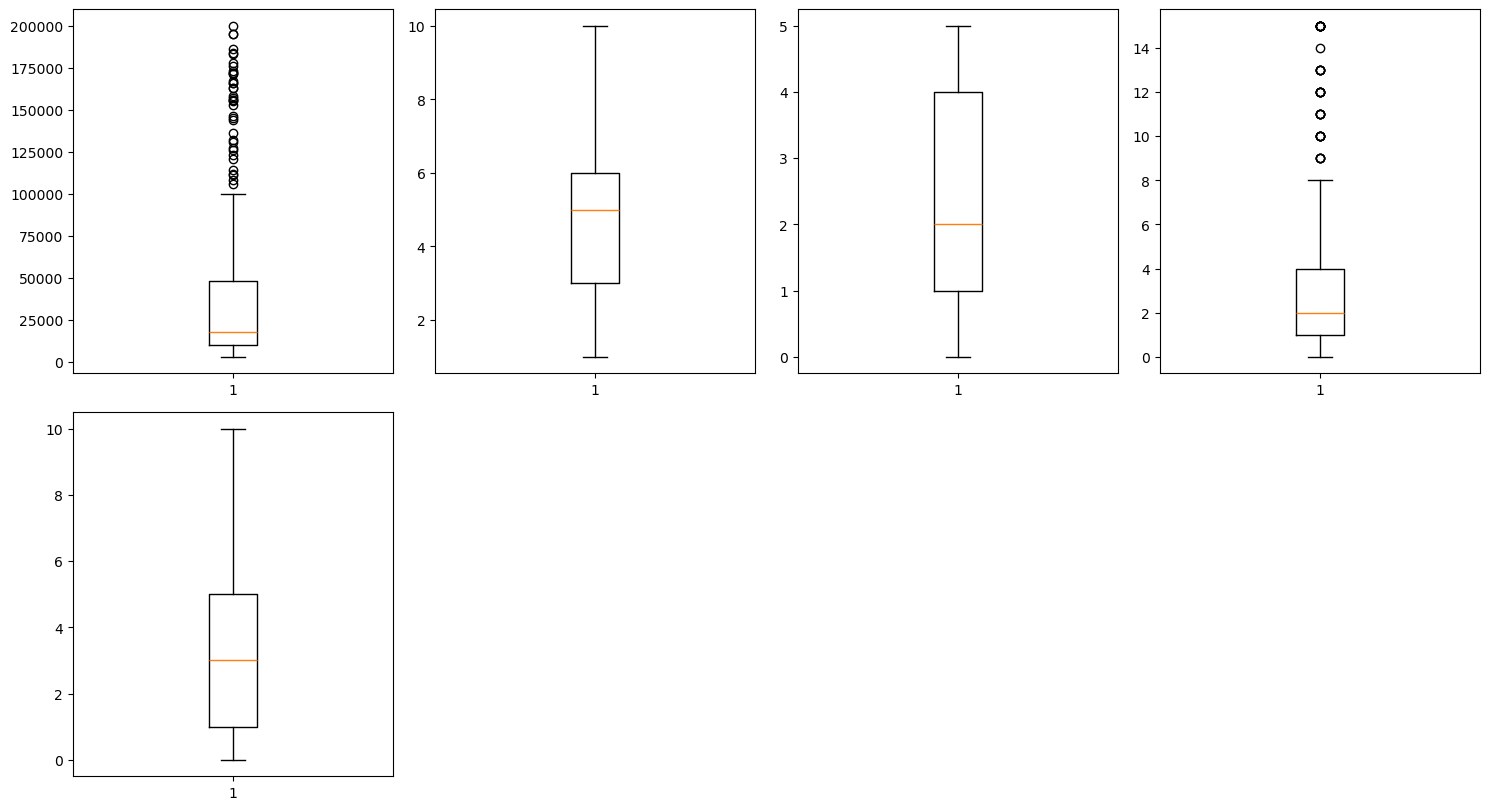

In [13]:
plt.figure(figsize=(15, 12))

for i , variable in enumerate(numeric_col): # The enumerate() function takes an iterable  and returns a sequence of tuples. Each tuple contains two elements:The index (position) of the item in the original iterable.The item itself.
    plt.subplot(3,4, i+1)
    plt.boxplot(df[variable], whis = 1.5)
    plt.tight_layout()
plt.show()

## Scaling Technique 

array([[ 1.76707628, -1.24170449, -0.85856807, -0.54664171, -1.25700595],
       [ 0.42344023, -0.78037922, -1.47116294,  2.51652641,  1.88417679],
       [ 0.42344023,  1.06492183, -0.85856807,  0.13406232,  0.13907527],
       ...,
       [ 2.97634873,  1.52624709, -0.85856807,  2.1761744 , -0.90798565],
       [ 3.70191219,  2.44889762, -0.85856807,  4.21828648, -1.25700595],
       [ 3.56754859,  1.98757236, -1.47116294,  3.19723044, -0.55896534]])

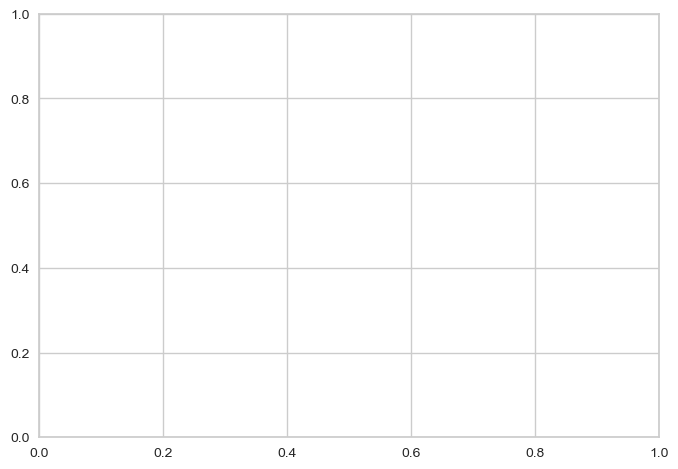

In [24]:
scaler = StandardScaler()
scaled_subset = scaler.fit_transform(df)
scaled_subset

In [25]:
scaled_subset_df = pd.DataFrame(scaled_subset , columns=df.columns)
scaled_subset_df

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1.767076,-1.241704,-0.858568,-0.546642,-1.257006
1,0.423440,-0.780379,-1.471163,2.516526,1.884177
2,0.423440,1.064922,-0.858568,0.134062,0.139075
3,-0.114014,0.142271,-0.858568,-0.546642,0.139075
4,1.767076,0.603597,-1.471163,3.197230,-0.209945
...,...,...,...,...,...
650,1.740204,2.448898,-0.858568,2.516526,-1.257006
651,1.337113,2.448898,-0.858568,3.537582,-0.558965
652,2.976349,1.526247,-0.858568,2.176174,-0.907986
653,3.701912,2.448898,-0.858568,4.218286,-1.257006


## Model Building

In [26]:
from sklearn.cluster import KMeans

In [27]:
from yellowbrick.cluster import KElbowVisualizer

In [28]:
km = KMeans(random_state=42)

In [29]:
visualizer = KElbowVisualizer(km , k = (1,8), timings = False)

KElbowVisualizer(ax=<Axes: >, estimator=KMeans(n_clusters=7, random_state=42),
                 k=(1, 8), timings=False)

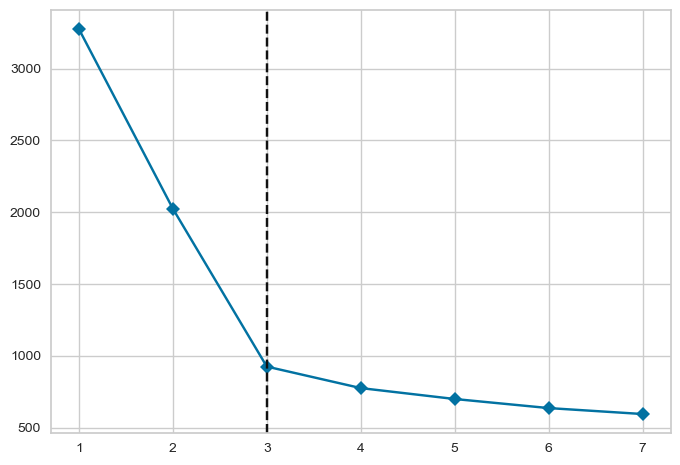

In [30]:
visualizer.fit(scaled_subset_df)

In [31]:
visualizer.show()

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

## The appropriate value of k from the Elbow curve seems to be 3

In [32]:
kmeans = KMeans(n_clusters= 3 , random_state= 0)

In [33]:
kmeans.fit(scaled_subset_df)

KMeans(n_clusters=3, random_state=0)

In [35]:
customer_data["K_means_segments"] = kmeans.labels_    # original data

customer_data.head()

,Sl_No,Customer_Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,K_means_segments
0,1,87073,100000,2,1,1,0,0
1,2,38414,50000,3,0,10,9,1
2,3,17341,50000,7,1,3,4,0
3,4,40496,30000,5,1,1,4,0
4,5,47437,100000,6,0,12,3,2


<Axes: xlabel='Avg_Credit_Limit', ylabel='Total_Credit_Cards'>

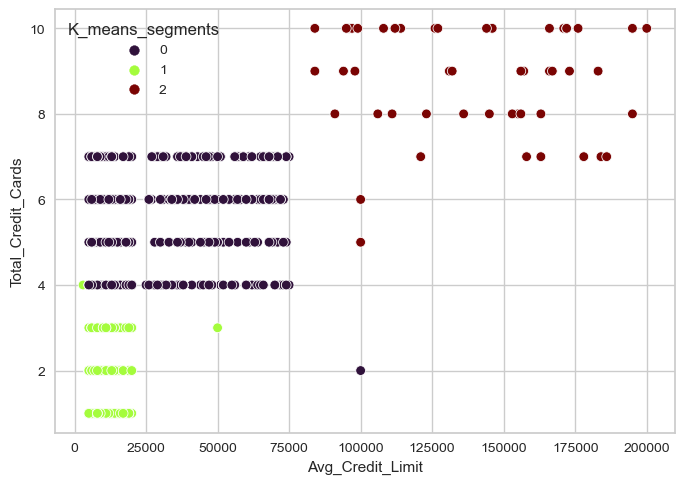

In [38]:
sns.scatterplot(data = customer_data, x = 'Avg_Credit_Limit', y = 'Total_Credit_Cards' , hue = 'K_means_segments', palette = 'turbo')